# A Data-Driven Study on How Extracurricular Activities Influence Gpa and Mental Well-being

### A Mini Project - Data Analytics
Prepared by : [Nur Anis Saffiya & Farah Nur Sabrina]


## Objective

The objective of this anlysis is to explore the impact of extracurricular activities on students academic performance (GPA) and overall well-being.

Specifically, we aim to:
- Analyze the relationship between types of extracurricular activities and GPA.
- Evaluate how different levels of involvement affect students well-being scores.
- To identify which types of extracurricular activities are most beneficial to student well-being.

In [16]:
import pandas as pd

In [17]:
import seaborn as sns

In [18]:
import numpy as np

In [19]:
import streamlit as st

In [20]:
%matplotlib inline

In [21]:
import matplotlib.pyplot as plt

In [22]:
import plotly.express as px

In [23]:
df=pd.read_csv("impact_of_extracurricular_activites_on_academic_performance_of_students.csv")

### Dataframe of Students Activity and Well-being

In [25]:
print(df)

    Student_ID     Extracurricular_Activity   GPA  Wellbeing_Score
0        S0001   Volunteer Work (Low Hours)  2.78              5.8
1        S0002      Sports (High Intensity)  3.43              6.2
2        S0003      Sports (High Intensity)  2.44              5.0
3        S0004   Volunteer Work (Low Hours)  3.13              6.3
4        S0005     Clubs (High Involvement)  2.88              6.3
..         ...                          ...   ...              ...
995      S0996       Sports (Low Intensity)  3.21              6.8
996      S0997   Volunteer Work (Low Hours)  2.00              8.0
997      S0998  Volunteer Work (High Hours)  3.19              9.7
998      S0999   Volunteer Work (Low Hours)  3.53              6.6
999      S1000     Clubs (High Involvement)  4.00              8.1

[1000 rows x 4 columns]


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   object 
 1   Extracurricular_Activity  857 non-null    object 
 2   GPA                       1000 non-null   float64
 3   Wellbeing_Score           1000 non-null   float64
dtypes: float64(2), object(2)
memory usage: 31.4+ KB


In [27]:
# to identify and clean missing values

In [28]:
df.replace('',np.nan, inplace=True)

In [29]:
print(df.isnull().sum())

Student_ID                    0
Extracurricular_Activity    143
GPA                           0
Wellbeing_Score               0
dtype: int64


In [30]:
# replace '' to 'unknown' for python to read missing values

In [31]:
df['Extracurricular_Activity']=df['Extracurricular_Activity'].fillna('unknown')

In [32]:
print(df.isnull().sum())

Student_ID                  0
Extracurricular_Activity    0
GPA                         0
Wellbeing_Score             0
dtype: int64


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Student_ID                1000 non-null   object 
 1   Extracurricular_Activity  1000 non-null   object 
 2   GPA                       1000 non-null   float64
 3   Wellbeing_Score           1000 non-null   float64
dtypes: float64(2), object(2)
memory usage: 31.4+ KB


In [34]:
df.describe()

,GPA,Wellbeing_Score
count,1000.000000,1000.000000
mean,2.995700,7.232100
std,0.480807,1.333934
min,2.000000,3.000000
25%,2.657500,6.300000
50%,3.000000,7.200000
75%,3.340000,8.100000
max,4.000000,10.000000


In [35]:
#identifying any outliers in GPA score

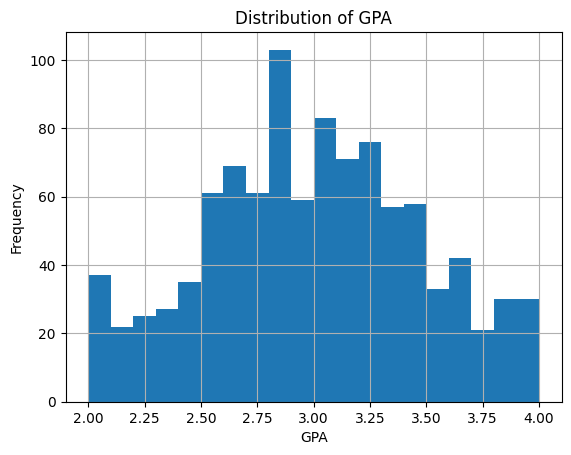

In [36]:
df['GPA'].hist(bins=20)
plt.xlabel('GPA')
plt.ylabel('Frequency')
plt.title('Distribution of GPA')
plt.show()

In [37]:
print(df['Student_ID'])

0      S0001
1      S0002
2      S0003
3      S0004
4      S0005
       ...  
995    S0996
996    S0997
997    S0998
998    S0999
999    S1000
Name: Student_ID, Length: 1000, dtype: object


In [38]:
#to identidy duplicate data

In [39]:
df.duplicated().sum()

np.int64(0)

In [40]:
# renaming data in simpler name

In [41]:
df=df.rename(columns={
    'Extracurricular_Activity':'Activity',
    'Wellbeing_Score':'Well-being'
})

In [42]:
# save cleaned data in form .csv in folder

In [43]:
df.to_csv('anissabrinacleaned_data.csv',index=False)


In [44]:
import pandas as pd

In [45]:
df= pd.read_csv('anissabrinacleaned_data.csv')

In [46]:
avg_gpa_by_activity = df.groupby("Activity")["GPA"].mean().sort_values()

In [47]:
# Convert the Series to a DataFrame
df_avg = avg_gpa_by_activity.reset_index()
df_avg.columns = ["Activity", "Average_GPA"]


In [48]:
#bar chart which shows if the specific activities linked to higher or lower GPA

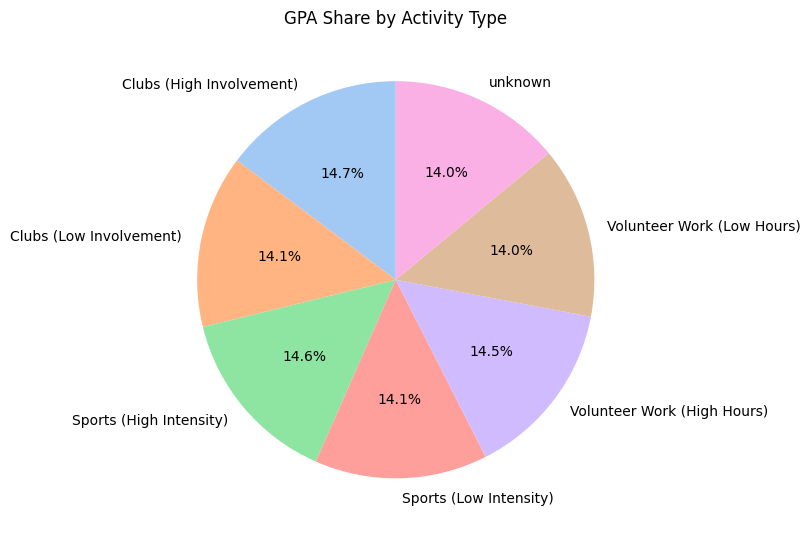

In [49]:
df_avg = df.groupby('Activity')['GPA'].mean()
df_avg.plot.pie(autopct='%1.1f%%', 
                figsize=(8,8), 
                startangle=90, 
                colors=sns.color_palette('pastel'), 
                ylabel='')

plt.title("GPA Share by Activity Type")
plt.tight_layout()
plt.show()

In [50]:
print(df.groupby('Activity')['GPA'].mean().sort_values(ascending=False))

Activity
Clubs (High Involvement)       3.093282
Sports (High Intensity)        3.060138
Volunteer Work (High Hours)    3.051522
Clubs (Low Involvement)        2.955714
Sports (Low Intensity)         2.952416
unknown                        2.937622
Volunteer Work (Low Hours)     2.934156
Name: GPA, dtype: float64


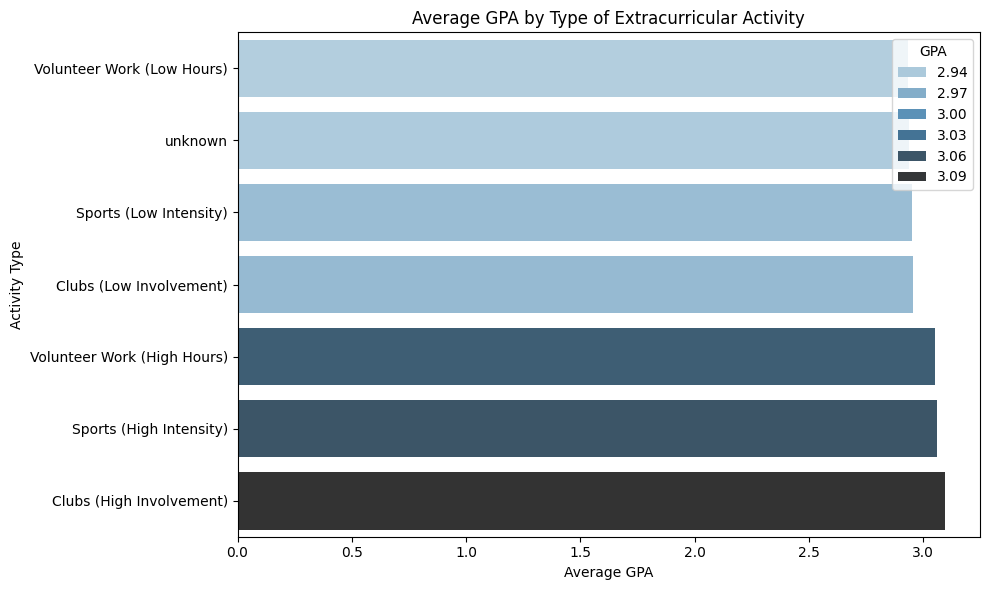

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average GPA per activity type
avg_gpa_by_activity = df.groupby("Activity")["GPA"].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=avg_gpa_by_activity.values, y=avg_gpa_by_activity.index, hue=avg_gpa_by_activity, palette="Blues_d")
plt.title("Average GPA by Type of Extracurricular Activity")
plt.xlabel("Average GPA")
plt.ylabel("Activity Type")
plt.tight_layout()
plt.show()


In [52]:
#chart shows level of participation in extracurricular activities affects student well-being and academic performance.

In [ ]:
# Analyze the impact of different levels of activity intensity or involvement on GPA and wellbeing.

In [122]:
df['Involvement_Level'] = df['Activity'].apply(
    lambda x: 'High' if 'High' in x else 'Low'
)
print(df.head())


  Student_ID                    Activity   GPA  Well-being Involvement_Level  \
0      S0001  Volunteer Work (Low Hours)  2.78         5.8               Low   
1      S0002     Sports (High Intensity)  3.43         6.2              High   
2      S0003     Sports (High Intensity)  2.44         5.0              High   
3      S0004  Volunteer Work (Low Hours)  3.13         6.3               Low   
4      S0005    Clubs (High Involvement)  2.88         6.3              High   

  Intensity_Level  
0             Low  
1            High  
2            High  
3             Low  
4            High  


In [124]:
print(df.tail())

    Student_ID                     Activity   GPA  Well-being  \
995      S0996       Sports (Low Intensity)  3.21         6.8   
996      S0997   Volunteer Work (Low Hours)  2.00         8.0   
997      S0998  Volunteer Work (High Hours)  3.19         9.7   
998      S0999   Volunteer Work (Low Hours)  3.53         6.6   
999      S1000     Clubs (High Involvement)  4.00         8.1   

    Involvement_Level Intensity_Level  
995               Low             Low  
996               Low             Low  
997              High            High  
998               Low             Low  
999              High            High  


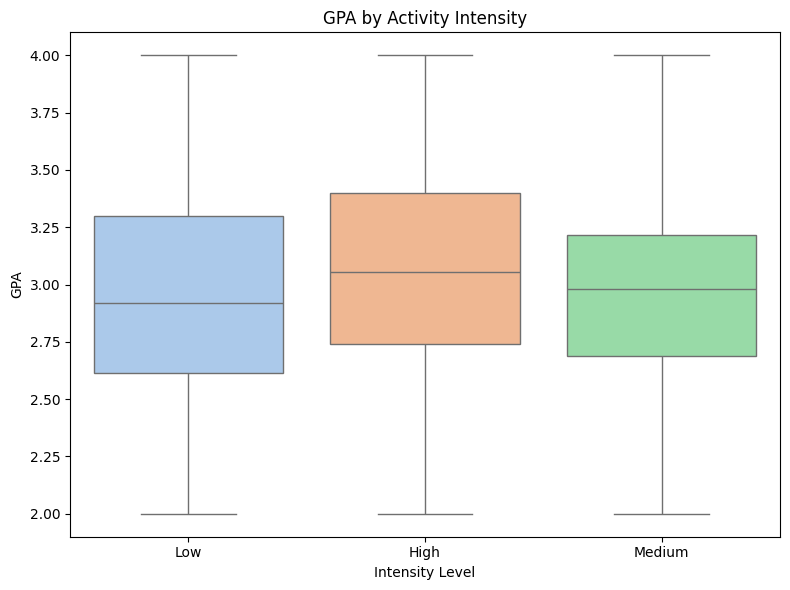

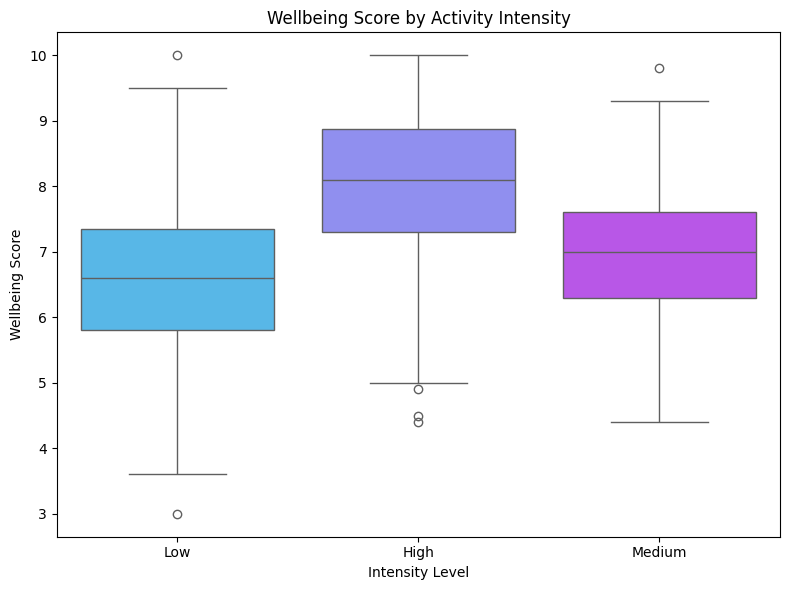

In [126]:
def get_intensity(activity):
    if "High" in activity:
        return "High"
    elif "Low" in activity:
        return "Low"
    else:
        return "Medium"

df["Intensity_Level"] = df["Activity"].apply(get_intensity)
plt.figure(figsize=(8, 6))
sns.boxplot(x="Intensity_Level", y="GPA", data=df, hue="Intensity_Level", palette="pastel", legend=False )
plt.title("GPA by Activity Intensity")
plt.xlabel("Intensity Level")
plt.ylabel("GPA")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x="Intensity_Level", y="Well-being", data=df, hue="Intensity_Level", palette="cool", legend=False)
plt.title("Wellbeing Score by Activity Intensity")
plt.xlabel("Intensity Level")
plt.ylabel("Wellbeing Score")
plt.tight_layout()
plt.show()

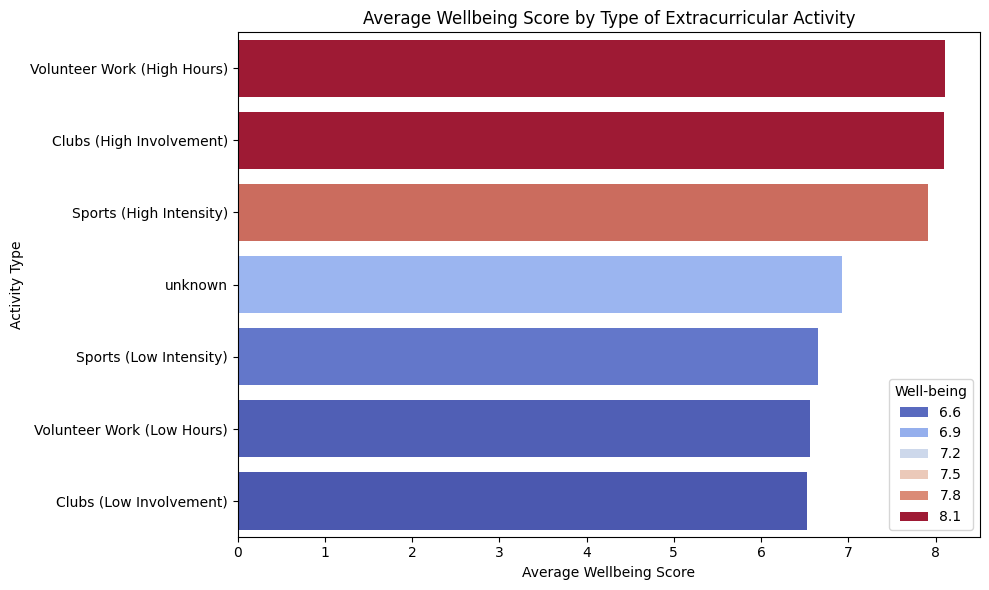

In [127]:


# Group by activity type and calculate average wellbeing
df_avg_wellbeing = df.groupby('Activity')['Well-being'].mean().reset_index()

# Sort by wellbeing score (optional)
df_avg_wellbeing = df_avg_wellbeing.sort_values(by='Well-being', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=df_avg_wellbeing, x="Well-being", y="Activity", hue="Well-being", palette="coolwarm")

# Titles and labels
plt.title("Average Wellbeing Score by Type of Extracurricular Activity")
plt.xlabel("Average Wellbeing Score")
plt.ylabel("Activity Type")
plt.tight_layout()
plt.show()


In [ ]:
# Explore the correlation between academic performance and student wellbeing.

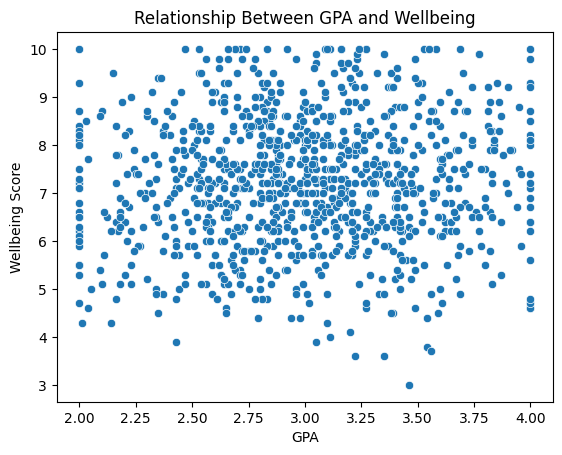

Correlation coefficient: 0.06399336434912495


In [142]:
sns.scatterplot(data=df, x='GPA', y='Well-being')
plt.title("Relationship Between GPA and Wellbeing")
plt.xlabel("GPA")
plt.ylabel("Wellbeing Score")
plt.show()
correlation = df['GPA'].corr(df['Well-being'])
print("Correlation coefficient:", correlation)